In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def d(u,v):
    diff = u-v
    return diff.dot(diff)


In [3]:
def cost(X,R,M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost +=R[n,k]*d(M[k],X[n])
    return cost
    


In [4]:
def plot_k_means(X,K, max_iter=20, beta=0.1):
    N,D = X.shape
    M = np.zeros((K,D))
    R = np.zeros((N,K))
    
    #initialise M to random
    for k in range(K):

        M[k] = X[np.random.choice(N)]

    #adding a grid to see the changes in the scatter plots and ensuring that they arent overwritten
    grid_width = 5
    grid_height = max_iter/grid_width
    random_colors = np.random.random((K,3))
    plt.figure()
    
    costs = np.zeros(max_iter)

    #step 1 = determine assignments/ responsibilities
    for i in range(max_iter):
        # moving plots inside for loop
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i+1)
        plt.scatter(X[:,0], X[:,1], c=colors)
        
        for k in range(K):

            for n in range(N):

                R[n,k] = np.exp(-beta*d(M[k], X[n]))/ np.sum( np.exp(-beta*d(M[j],X[n])) for j in range(K))
                
#         Recalculate Means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
            
        costs[i] = cost(X,R,M)
        if i>0:
            if np.abs(costs[i] - costs[i-1])<0.1:
                break
                
        plt.plot(costs)
        plt.title("Costs")
        plt.show()
        
#       random_colors = np.random.random((K,3))
#       colors = R.dot(random_colors)
#       plt.scatter(X[:,0], X[:,1], c=colors)
#       plt.show()

In [5]:
def main():
    D=2 #"Visualisation"
    s=4 # How far apart are the means"

# Defining the means below*
    mu1= np.array([0,0]) #mean at Origin"
    mu2 = np.array ([s,s]) #""
    mu3 = np.array ([0,s]) #""
    

    N = 900 #"Samples == 300 samples for each class"
    X= np.zeros((N,D))
    X[:300, :] = np.random.randn(300,D) +mu1 #random noise + first mean
    X[300:600, :] = np.random.randn(300,D) +mu2 #random noise + second mean
    X[600:, :] = np.random.randn(300,D) +mu3 #random noise + third mean

    plt.scatter(X[:,0], X[:,1])
    plt.show()
    
    K=3
    plot_k_means(X,K)
    
    K=5
    plot_k_means(X,K, max_iter=30)
    

    K=5
    plot_k_means(X,K, max_iter=30, beta=0.3)
    

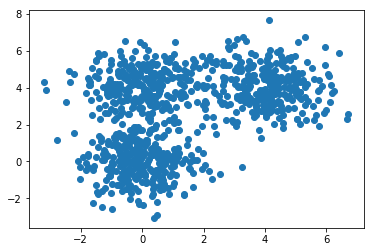

C:\Users\Aashya.Khanduja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


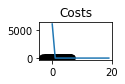

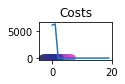

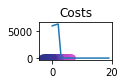

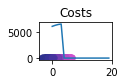

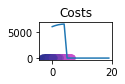

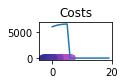

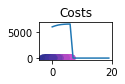

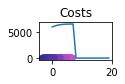

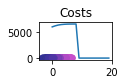

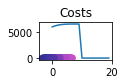

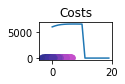

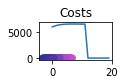

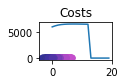

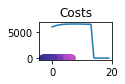

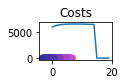

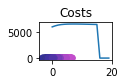

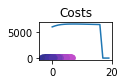

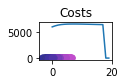

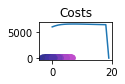

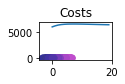

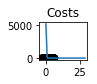

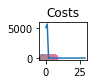

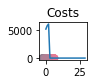

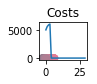

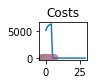

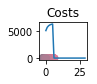

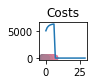

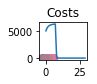

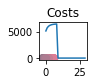

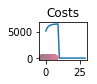

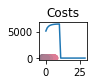

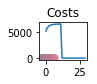

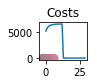

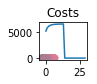

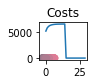

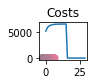

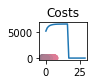

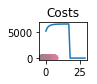

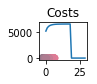

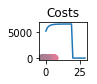

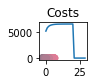

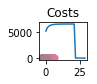

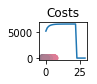

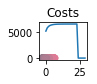

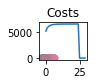

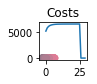

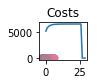

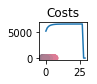

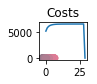

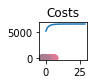

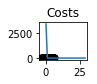

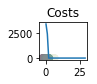

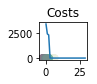

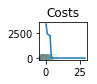

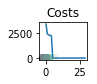

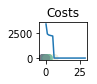

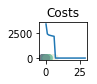

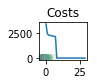

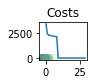

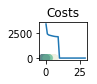

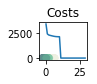

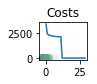

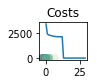

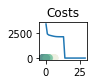

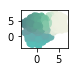

In [6]:
if __name__ == '__main__':
    main()